In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
dataset = pd.read_csv('Mall_Customers.csv')

In [13]:
dataset.shape

(200, 5)

In [14]:
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [17]:
X = dataset.iloc[:,[3,4]].values

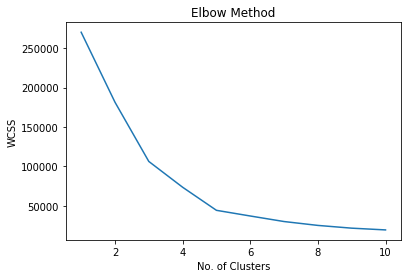

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()
#dip is at 5

In [21]:
kmeans = KMeans(n_clusters=5, init = 'k-means++',random_state = 42)
y_kmeans=kmeans.fit_predict(X)

In [23]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [26]:
dataset.head(20)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


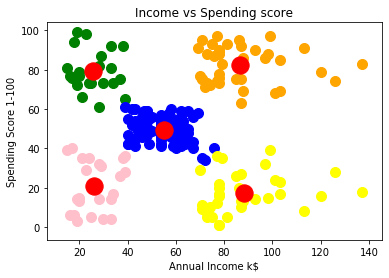

In [33]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='green',label=('Low Income,High Score'))
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label=('Mid Income,Mid score'))
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='orange',label=('High Income, High Score'))
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='pink',label=('Low Income,Low Score'))
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='yellow',label=('High Income, Low Score'))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroid')
plt.title('Income vs Spending score')
plt.xlabel('Annual Income k$')
plt.ylabel('Spending Score 1-100')
#plt.legend()
plt.show()